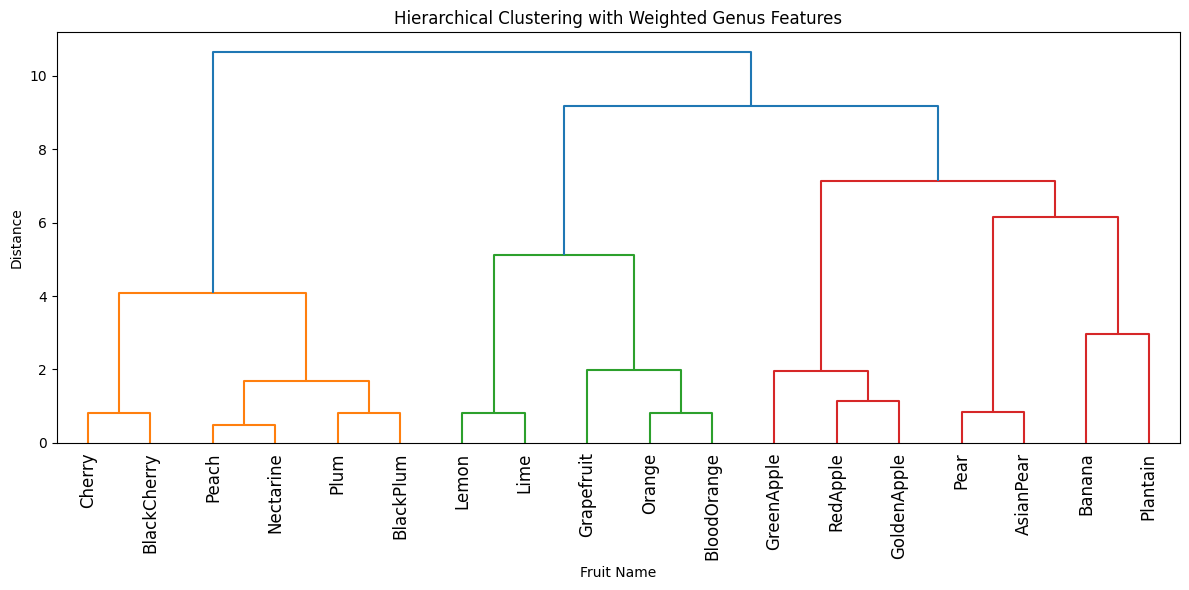

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset
df = pd.read_csv('/content/Synthetic Hierarchical Clustering Dataset - Auxin Security.csv')

# Numeric features
num_features = df[['weight_grams', 'sweetness_level', 'color_intensity']]

# One-hot encode genus
genus_dummies = pd.get_dummies(df['genus'])

# Scale numeric features
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_features)

# Weight genus features more strongly by multiplying
genus_weight = 3  # try 3 or higher to emphasize genus
genus_weighted = genus_dummies.values * genus_weight

# Combine scaled numeric and weighted genus features
features = np.hstack([num_scaled, genus_weighted])

# Perform hierarchical clustering
linked = linkage(features, method='ward')

# Plot dendrogram with fruit names
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=df['fruit_name'].values,
    orientation='top',
    distance_sort='ascending',
    show_leaf_counts=True,
    leaf_rotation=90
)
plt.title('Hierarchical Clustering of Fruit Samples')
plt.xlabel('Fruit Name')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()